In [1]:
# for data analysis
import numpy as np
import scipy as sp
import h5py

# for plotting some density plots
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# read in data from .hdf5 files
# O1 Release Paper: DOI:10.1103/PhysRevX.6.041015 and arXiv:1606.04856:
# NOTE: The spins in these data files are given at the gravitational-wave frequency f = 20 Hz

eventnames = ["GW150914", "GW151226", "LVT151012"]

# dict which holds data for each event and type (SEOBNR, IMRPP, Overall)
event_data = {}

# loop through set of event data for each waveform type and add all the data to event_data
for eventname in eventnames:
    # add separate fields to the dict
    event_data[eventname] = {'SEOBNR': 0, 'IMRPP': 0, 'Overall': 0}
    event_filename = '%s_data.h5'%eventname # these h5 files are also available
    # open file and start reading in each waveform type data
    f = h5py.File(event_filename, 'r')
    
    event_data[eventname]['SEOBNR'] =  f['allSsp_post']
    event_data[eventname]['IMRPP'] =  f['allIsp_post']
    event_data[eventname]['Overall'] =  f['overall_post']

In [3]:
# we can access each waveform type's data using event_data[<eventname>][<waveform type>][<param>]
event_data[eventnames[0]]['IMRPP'].dtype

dtype([('a2', '<f8'), ('tilt2', '<f8'), ('tilt1', '<f8'), ('a1', '<f8'), ('distance', '<f8'), ('theta_jn', '<f8'), ('time', '<f8'), ('mass1_det', '<f8'), ('right_ascension', '<f8'), ('mass2_det', '<f8'), ('declination', '<f8')])

Here are some brief descriptions of these parameters and their uses:

distance: luminosity distance [Mpc]

time: geocenter time of signal arrival at earth [s]

mass1_det: primary (larger) black hole mass (detector frame) [solar mass]

mass2_det: secondary (smaller) black hole mass (detector frame) [solar mass]

right_ascension, declination: right ascension and declination of the source [rad]

theta_jn: angle between line of sight and total angular momentum vector of system [rad]

a1, tilt1: primary (larger) black hole spin magnitude and zenith angle between the spin and the orbital angular 
momentum vector of system [dimensionless,rad]

a2, tilt2: secondary (smaller) black hole spin magnitude and zenith angle between the spin and the orbital angular momentum vector of system [dimensionless,rad]

In [4]:
# some functions for plotting various params
def plot_param(param, waveform_type, xlabel, ylabel = 'Posterior PDF'):
    # plots probability densities of the param for each of the events overlayed on each other
    
    # if we're plotting spins, we want to make sure that we don't leak 
    # density past the allowed spin range
    reduced_range = None
    xLim = None
    if ('spin' in param):
        reduced_range = (-1.0, 1.0)
        xLim = [-1.0, 1.0]
    
    # use hex codes similar to colors used in papers
    sns.kdeplot(event_data[eventnames[0]][waveform_type][param], label = eventnames[0], 
                                                color = '#0072b2', clip = reduced_range)
    sns.kdeplot(event_data[eventnames[1]][waveform_type][param], label = eventnames[1], 
                                                color = '#d55e00', clip = reduced_range)
    sns.kdeplot(event_data[eventnames[2]][waveform_type][param], label = eventnames[2], 
                                                color = '#009e73', clip = reduced_range)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xLim)
    plt.title('Posterior Probability Densities of %s using %s'%(xlabel,waveform_type))
    plt.show()

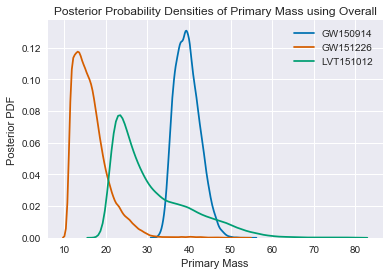

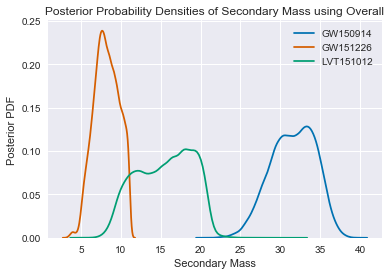

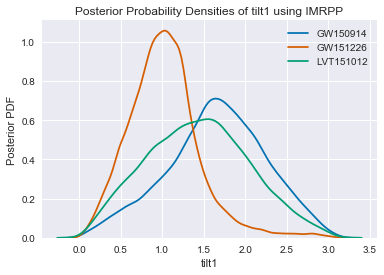

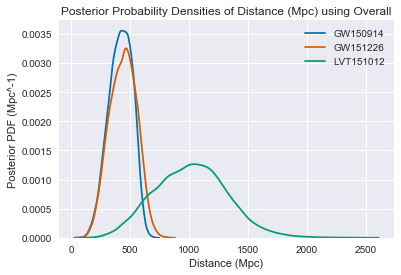

In [5]:
# show some posterior plots for the params
plot_param('mass1_det', 'Overall', 'Primary Mass')
plot_param('mass2_det',  'Overall', 'Secondary Mass',)
plot_param('tilt1', 'IMRPP', 'tilt1',)
plot_param('distance', 'Overall', 'Distance (Mpc)', 'Posterior PDF (Mpc^-1)')